## ALUMNO

*PEDRO DANIEL ZAPATA HERRERA*

### Ejercicio

Utilzar los archivos "datos/ventas/*.txt" para contestar las siguientes preguntas. A continuación el código propuesto para obtener el dataframe:

```python
files = glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered'] 
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

from glob import *

<div class="alert alert-success">
    
0. Explicar que hace el código de arriba
    
</div> 

In [3]:
files = glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered']
df['Order Date'] = pd.to_datetime(df['Order Date'])#'%m/%d/%Y %H:%M'
df.head()

C:\Users\ZAPATA\AppData\Local\Temp\ipykernel_12892\918853842.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])#'%m/%d/%Y %H:%M'


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


```python
files = glob('datos/Ventas/*.txt')                      #Lee el nombre de todos los archivos .tex contenidos en la carpeta de ventas
df =  pd.concat((pd.read_csv(file) for file in files))  #Abre cada archivo .tex guardados en files y los une en un solo dataframe con axis=0
df=df.dropna(axis='rows',how='any')                     #Se eliminan todos los elementos nulos de las filas del dataframe
df=df[df['Quantity Ordered']!='Quantity Ordered']       #
df                                                      #Se imprime el dataframe
```

<div class="alert alert-success">
    
1. Encuentre el número de productos que se adquirieron en Los Angeles, CA
    
</div> 

In [3]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [4]:
def pet(x):
    return x.split(',')[1]
df['Estado']=df['Purchase Address'].apply(pet)
print('El número de productos que se adquirieron en Los Angeles es:',df[df['Estado']==' Los Angeles']['Quantity Ordered'].astype('int').sum())

El número de productos que se adquirieron en Los Angeles es: 33289


<div class="alert alert-success">
    
2. ¿Cuántos iPhone se vendieron?

    
</div> 

In [5]:
print('Se vendieron',df[df['Product']=='iPhone']['Quantity Ordered'].astype('int').sum(),'iPhones')

Se vendieron 6849 iPhones


<div class="alert alert-success">
    
3. ¿Cuánto fue su ganancia por venta de baterías? 
    
</div> 

In [6]:
def bat(x):
    if 'Batteries' in x[0]:
        return float(x[1]) * float(x[2])
    else:
        return 0
df['Baterias']=df[['Product','Quantity Ordered','Price Each']].apply(bat, axis=1)
print('La ganancia por venda de baterías fue de', df['Baterias'].sum())

C:\Users\ZAPATA\AppData\Local\Temp\ipykernel_16200\2366174652.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 'Batteries' in x[0]:
C:\Users\ZAPATA\AppData\Local\Temp\ipykernel_16200\2366174652.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return float(x[1]) * float(x[2])


La ganancia por venda de baterías fue de 198859.23


<div class="alert alert-success">
    
4. ¿Cuál fue el código postal que más ordenes realizó?

    
</div> 

In [7]:
def bat(x):
    return x.split(',')[2]
df['CP']=df['Purchase Address'].apply(bat)
#df['CP'].unique()
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
pd.DataFrame(df.groupby('CP')['Quantity Ordered'].sum().sort_values(ascending=0)).head(1)


,Quantity Ordered
CP,
CA 94016,50239


<div class="alert alert-success">
    
5.  a) ¿Cuál fue el producto con más ganancias?
    
    b) ¿Cuál fue el producto con más unidades vendidas?

    
</div> 

In [8]:
#a) ¿Cuál fue el producto con más ganancias?
df['Price Each']=df['Price Each'].astype('float')
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')

df1=pd.concat([df.groupby('Product')['Quantity Ordered'].sum(),
                df.groupby('Product')['Price Each'].unique().astype('float')],axis=1)
df1['Ganancia total']=df1['Quantity Ordered']*df1['Price Each']
df1[['Ganancia total']].sort_values(by='Ganancia total',ascending=0).head(1)

,Ganancia total
Product,
Macbook Pro Laptop,8037600.0


In [9]:
#b) ¿Cuál fue el producto con más unidades vendidas?
df.groupby('Product')[['Quantity Ordered']].sum().sort_values(by='Quantity Ordered',ascending=0).head(1)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017


<div class="alert alert-success">
    
6. ¿Cuales son los 5 productos más vendidos?     
</div> 

In [10]:
df.groupby('Product')[['Quantity Ordered']].sum().sort_values(by='Quantity Ordered',ascending=0).head()

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557


<div class="alert alert-success">
    
7.  ¿Cuales son los 5 productos con las ganancias más altas?

    
</div> 

In [11]:
df1[['Ganancia total']].sort_values(by='Ganancia total',ascending=0).head()

,Ganancia total
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56


<div class="alert alert-success">
    
8. ¿A qué hora recomendaría mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?     
</div> 

In [12]:
df = df.set_index('Order Date')

<Axes: xlabel='Order Date'>

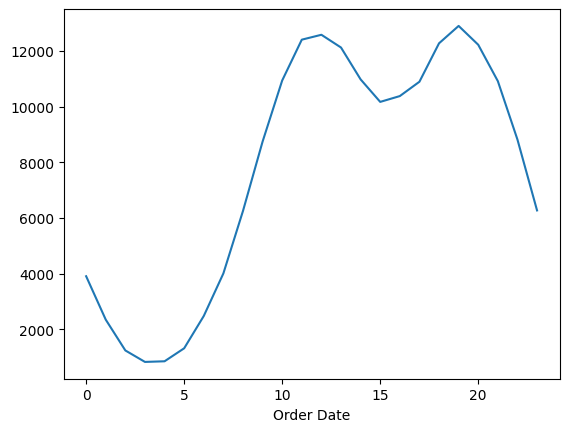

In [13]:
df.groupby(df.index.hour).count()['Quantity Ordered'].plot()

In [14]:
pd.DataFrame(df.groupby(df.index.hour).count()['Quantity Ordered'].sort_values(ascending=0)).head()

,Quantity Ordered
Order Date,
19,12905
12,12587
11,12411
18,12280
20,12228


In [15]:
print('La hora del día en la que conviene poner anuncios es a las',
        df.groupby(df.index.hour).count()['Quantity Ordered'].sort_values(ascending=0).head(1).index[0],
      'hr pues es ahí cuando se realizaron más órdenes en todo el año, con un total de',
        df.groupby(df.index.hour).count()['Quantity Ordered'].sort_values(ascending=0).head(1).values[0]
     )

La hora del día en la que conviene poner anuncios es a las 19 hr pues es ahí cuando se realizaron más órdenes en todo el año, con un total de 12905


<div class="alert alert-success">
    
 9. 
    a) ¿Cuál es el día de más ganancias por cada mes?
    
    b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
    
</div> 

In [16]:
#9. a) ¿Cuál es el día de más ganancias por cada mes?
df['Ganancia']=df['Quantity Ordered'].astype('int')*df['Price Each'].astype('float')
df4=df[['Ganancia']].resample('d').sum()

l=[]
for i in range(12):
    l.append(
        df4[df4.index.month==i+1].sort_values(by='Ganancia',ascending=0).head(1)
    )
l
pd.concat(l,axis=0)

,Ganancia
Order Date,
2019-01-11,78414.54
2019-02-08,94507.13
2019-03-22,102992.11
2019-04-24,136177.32
2019-05-26,113490.20
2019-06-09,99484.39
2019-07-21,104283.77
2019-08-10,95160.63
2019-09-09,79465.82


In [17]:
#b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
df4=df[['Ganancia']].resample('m').sum()
df4

,Ganancia
Order Date,
2019-01-31,1813586.44
2019-02-28,2202022.42
2019-03-31,2807100.38
2019-04-30,3390670.24
2019-05-31,3152606.75
2019-06-30,2577802.26
2019-07-31,2647775.76
2019-08-31,2244467.88
2019-09-30,2097560.13


In [18]:
print('El mes',
      df4.sort_values(by='Ganancia',ascending=0).head(1).index.month[0],
      'es el que tiene mayor ganancia con un total de',
      df4.sort_values(by='Ganancia',ascending=0).head(1).values[0]
     )
print('\n')
print('El mes',
      df4.sort_values(by='Ganancia',ascending=0).tail(1).index.month[0],
      'es el que tiene menor ganancia con un total de',
      df4.sort_values(by='Ganancia',ascending=0).tail(1).values[0]
     )

El mes 12 es el que tiene mayor ganancia con un total de [4613443.34]


El mes 1 es el que tiene menor ganancia con un total de [8670.29]


<div class="alert alert-success">
    
10. ¿Cuál fue el producto más comprado en San Francisco, CA
    
</div> 

In [44]:
#df[df['Estado']==' San Francisco']['Product'].value_counts().head(1)

In [41]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
pd.DataFrame(df[df['Estado']==' San Francisco'].groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=0)).head(1)

,Quantity Ordered
Product,
AAA Batteries (4-pack),7408
